In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
     

In [2]:

data=pd.read_excel("C:\\Users\\DELL\\Downloads\\Copper_Set.xlsx")
df=data.copy()
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [3]:

df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [4]:
#Some rubbish values are present in ‘Material_Ref’ which starts with ‘00000’ value which are converted into NaN.
a=df['material_ref'].str.startswith('00000')
b=(a==True)
df['material_ref'][b]=np.NaN
df.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_26320/1820227723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['material_ref'][b]=np.NaN


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [5]:

df.shape

(181673, 14)

In [6]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [7]:
#divinding catogorigal(mode) and continuous(mean) valued columns
median=[]
mode=['item_date','customer','status','item type','application','material_ref','country','delivery date','product_ref']
mean=['quantity tons','thickness','width','selling_price']
columns=list(df.columns) 
columns.remove('id')

In [8]:

#found 'e' in quality tons so replacing it with NaN
df['quantity tons']=df['quantity tons'].replace('e',np.NaN).astype('float64').abs()

#while changing to date format makes a error
df['item_date']=df['item_date'].replace(19950000,np.NaN)
df['item_date']=df['item_date'].replace(20191919,np.NaN)
df['delivery date']=df['delivery date'].replace(30310101,np.NaN)
df['delivery date']=df['delivery date'].replace(20212222,np.NaN)

In [9]:
df.isnull()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,False,False,False,False,False,False,False,False,False,False,True,False,False,False
181669,False,False,False,False,False,False,False,False,False,False,True,False,False,False
181670,False,False,False,False,False,False,False,False,False,False,True,False,False,False
181671,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [10]:
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [11]:

for i in columns:
  if i in median:
    df[i].fillna(df[i].median(),inplace=True)
  elif i in mode:
    df[i].fillna(df[i].mode()[0],inplace=True)
  elif i in mean:
    df[i].fillna(df[i].mean(),inplace=True)
df.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [12]:
# Changing dtypes in df(if any found)
df['country']=df['country'].astype('int64')
df['application']=df['application'].astype('int64')

In [13]:
#changig item date and delivery date to date format
df['item_date'] = pd.to_datetime(df['item_date'].astype('int64'),format='%Y%m%d')

In [14]:
df['delivery date'] = pd.to_datetime(df['delivery date'].astype('int64'),format='%Y%m%d')


In [15]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25,Won,W,41,0.80,1210.0,DX51D+Z,1.668702e+09,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00


<function matplotlib.pyplot.show(close=None, block=None)>

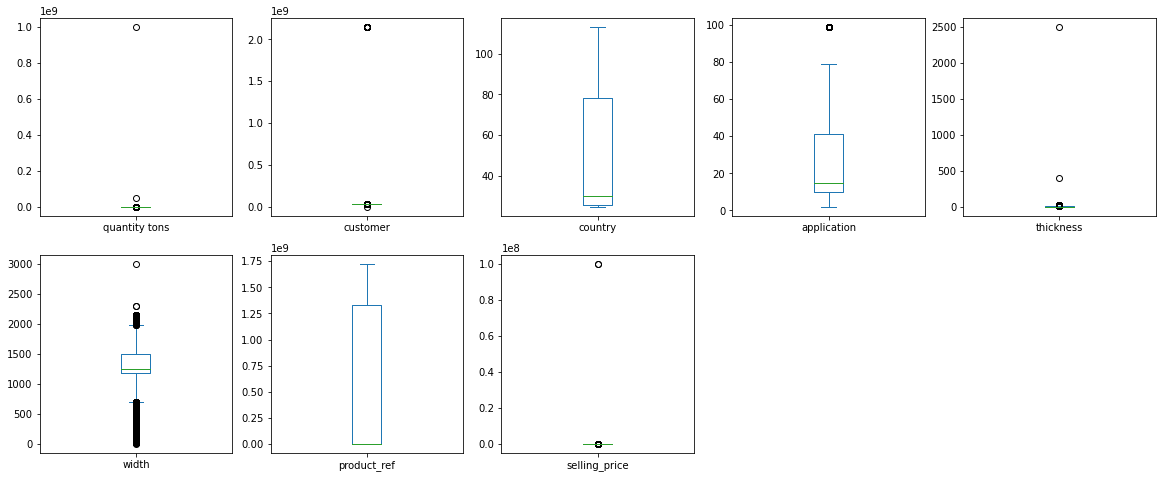

In [16]:
# Finding outliers and skewness

df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

In [17]:
df.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_26320/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


quantity tons    424.690816
customer          86.985308
country            0.753090
application        0.724555
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [18]:
# To find the lower and upper limit with IQR calculating the Interquartile Range of the data (IQR = Q3 — Q1). 
# Later, will be determine the outlier boundaries with IQR.where Q='table col'.quantile('0.25 and 0.75') 
# And getting the lower boundary with Q1–1.5 * IQR and getting upper boundary with Q3 + 1.5 * IQR.

correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  print('\n',i,' lower limit=',Q1-1.5 * IQR,' upper limit=',Q3+1.5 * IQR)


 quantity tons  lower limit= -73.31540512358451  upper limit= 151.44757009725032

 thickness  lower limit= -2.75  upper limit= 6.449999999999999

 width  lower limit= 700.0  upper limit= 1980.0

 selling_price  lower limit= 243.0  upper limit= 1379.0


In [19]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  Q1=df[i].quantile(0.02)
  Q3=df[i].quantile(0.98)
  print('\n',i,' lower limit=',Q1,' upper limit=',Q3)


 quantity tons  lower limit= 1.3687438786867419  upper limit= 702.789880521828

 thickness  lower limit= 0.4  upper limit= 12.0

 width  lower limit= 811.0  upper limit= 2000.0

 selling_price  lower limit= 432.0  upper limit= 1295.0


In [20]:
from scipy.stats.mstats import winsorize

<function matplotlib.pyplot.show(close=None, block=None)>

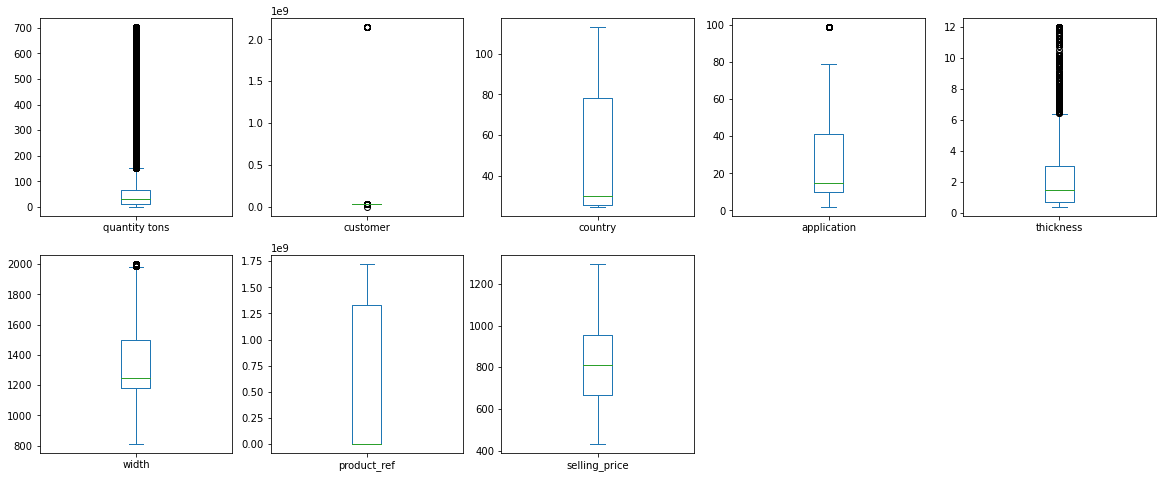

In [21]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  df[i]=winsorize(df[i],(0.02,0.02))
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

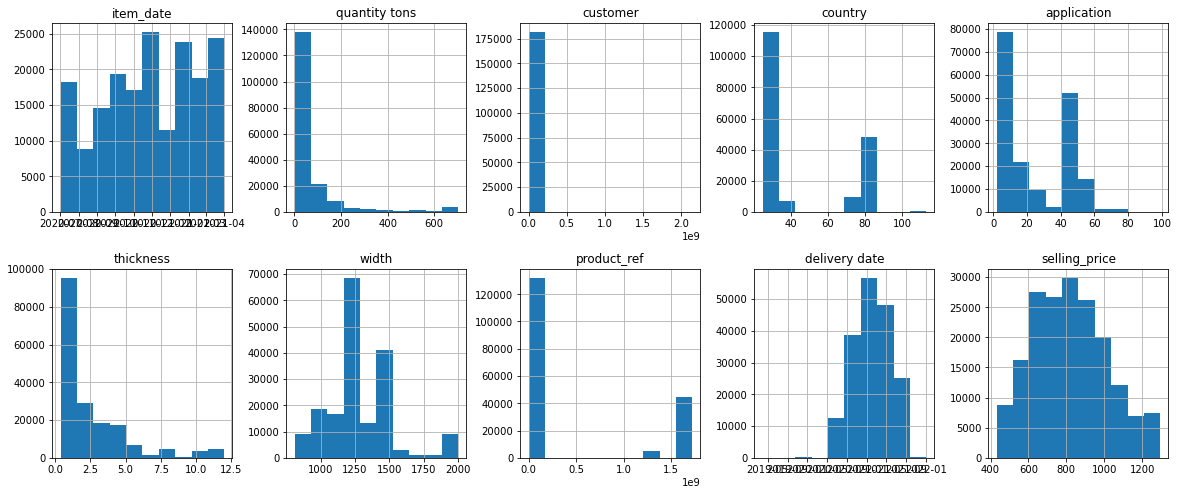

In [22]:
df.hist(layout=(2,5),figsize=(20,8))
plt.show()

In [23]:
df.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_26320/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


quantity tons     3.466226
customer         86.985308
country           0.753090
application       0.724555
thickness         1.971541
width             0.824430
product_ref       1.015216
selling_price     0.305634
dtype: float64

In [24]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673.000000
mean,73.461387,3.051221e+07,44.898125,25.613746,2.496851,1299.610025,4.739679e+08,821.179020
std,127.659700,2.433375e+07,24.405794,17.753909,2.585184,248.265048,7.175101e+08,198.321235
min,1.368630,1.245800e+04,25.000000,2.000000,0.400000,811.000000,6.117280e+05,432.000000
25%,10.970711,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000
50%,30.365004,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000
75%,67.161454,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000
max,702.793565,2.147484e+09,113.000000,99.000000,12.000000,2000.000000,1.722208e+09,1295.000000


In [25]:

from sklearn.preprocessing import LabelEncoder

In [26]:
cat_col=['country','status','customer','item type','application','material_ref','product_ref']
le = LabelEncoder()
for i in cat_col:
  print(i)
  print(df[i].unique())
  df[i] = le.fit_transform(df[i])
  print(df[i].unique())

country
[ 28  25  30  32  38  78  27  77 113  79  26  39  40  84  80 107  89]
[ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]
status
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
[7 0 6 1 2 8 5 4 3]
customer
[30156308. 30202938. 30153963. ... 30349515. 30284694. 30161559.]
[ 51 288  39 ... 953 687  97]
item type
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
[5 6 3 1 2 0 4]
application
[10 41 28 59 15  4 38 56 42 26 27 19 20 66 29 22 40 25 67 79  3 99  2  5
 39 69 70 65 58 68]
[ 4 17 12 21  5  2 14 19 18 10 11  6  7 23 13  8 16  9 24 28  1 29  0  3
 15 26 27 22 20 25]
material_ref
['DEQ1 S460MC' 'DX51D+Z' 'S0380700' ... 'MAS65550' '4.11043_1060X5_BRE'
 '202006170005.IO.1.1']
[5377 5484 9681 ... 8061 2179 1589]
product_ref
[1.67079878e+09 1.66870172e+09 6.28377000e+05 6.40665000e+05
 6.11993000e+05 1.66870138e+09 1.64141591e+08 1.67186374e+09
 1.33207714e+09 6.40405000e+05 1.69386755e+09 1.66557237e+09
 1.28200763e+09 1.66870170e

In [27]:
df['delivery_period']=(df['item_date']-df['delivery date']).abs().dt.days
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.0,1500.0,5377,24,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,702.793565,288,0,7,5,17,0.8,1210.0,5484,22,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,39,4,7,6,12,0.4,952.0,9681,5,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,955,5,7,3,21,2.3,1317.0,5651,22,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,702.793565,397,3,7,5,4,4.0,2000.0,1908,8,2021-03-01,577.00,31


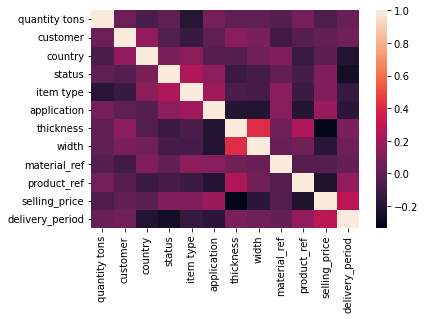

In [28]:
#Checking Accuray with ML models
#Regression Model
#understanding correlation with feautures and target
plt.figure()
sns.heatmap(df.iloc[:,2: ].corr())
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

x=df[['quantity tons','item type','country','application','thickness','width', 'product_ref','delivery_period']].values
y=df[['selling_price']].values

In [30]:


# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('scaling_regression.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:

lis=[LinearRegression(),ElasticNet(),LassoLars()]
models=['LinearRegression','ElasticNet','LassoLars']
score=[]
for i in lis:
  i.fit(X_train, Y_train)
  Y_pred=i.predict(X_test)
  score.append( r2_score(Y_test, Y_pred))

In [35]:

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 4}

In [36]:
#KNN
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

model.fit(X_train, Y_train)  #fit the model
Y_pred=model.predict(X_test)

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('KNeighborsRegressor')
score.append(r2_score(Y_test, Y_pred))

Mean squared error:  11850.941001728263
Mean absolute error:  73.51845643279145
R2 Score:  0.6973674053576246


In [37]:

#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=53)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
importances=model.feature_importances_

for i,v in zip(['quantity tons','customer','item type','country','application','thickness','width', 'product_ref','delivery_period'], importances):
  print('Feature:'',Score: ',(i,v))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('DecisionTreeRegressor')
score.append(r2_score(Y_test, Y_pred))

Feature:,Score:  ('quantity tons', 0.09319955790776918)
Feature:,Score:  ('customer', 0.02552878799090582)
Feature:,Score:  ('item type', 0.09287151433236986)
Feature:,Score:  ('country', 0.03997264893078727)
Feature:,Score:  ('application', 0.06100576201444735)
Feature:,Score:  ('thickness', 0.038497434210914235)
Feature:,Score:  ('width', 0.33496200009941046)
Feature:,Score:  ('product_ref', 0.3139622945133957)
Mean squared error:  10682.413543995865
Mean absolute error:  54.06294161134085
R2 Score:  0.7272076093036945


In [38]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=10, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=4, random_state=53, 
                            verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None).fit(X_train, Y_train)
Y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('ExtraTreesRegressor')
score.append(r2_score(Y_test, Y_pred))

Mean squared error:  5834.8039521253395
Mean absolute error:  43.54542584429762
R2 Score:  0.8509990169553823


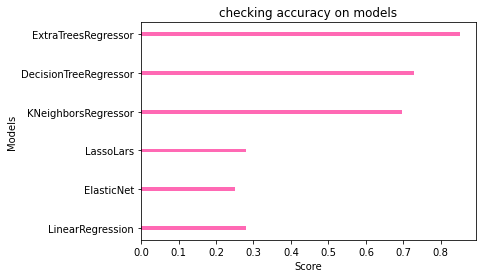

In [41]:
plt.barh(models, score,
        height = 0.1, color = "hotpink")
 
plt.xlabel("Score")
plt.ylabel("Models")
plt.title("checking accuracy on models")
plt.show()

In [42]:
#creating pickle files to save the trained models in a file

model = ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=10, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=4, random_state=53, 
                            verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None).fit(X_train, Y_train)
model.fit(X_train, Y_train)                          
pickle.dump(model, open('regression.pkl', 'wb'))

In [43]:
#Classification Model

won_lost=df.loc[df["status"].isin([7,1])]
won_lost.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.0,1500.0,5377,24,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,702.793565,288,0,7,5,17,0.8,1210.0,5484,22,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,39,4,7,6,12,0.4,952.0,9681,5,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,955,5,7,3,21,2.3,1317.0,5651,22,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,702.793565,397,3,7,5,4,4.0,2000.0,1908,8,2021-03-01,577.00,31


In [44]:
print(won_lost['status'].unique())
won_lost['status'] = le.fit_transform(won_lost['status'])
print(won_lost['status'].unique())

[7 1]
[1 0]


C:\Users\DELL\AppData\Local\Temp/ipykernel_26320/1371766872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_lost['status'] = le.fit_transform(won_lost['status'])


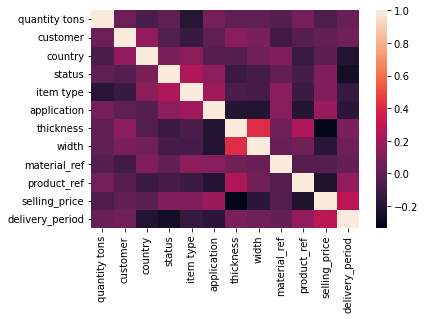

In [45]:
#understanding correlation with feautures and target
plt.figure()
sns.heatmap(df.iloc[:,2: ].corr())
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x=won_lost[['quantity tons','item type','country','application','thickness','width', 'product_ref','selling_price','delivery_period']].values
y=won_lost[['status']].values

<AxesSubplot:>

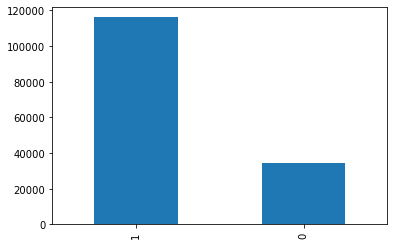

In [47]:
won_lost['status'].value_counts().plot(kind='bar')

In [48]:
#Oversampling using smote(Synthetic Minority Over-sampling TEchnique)
#It is a more sophisticated technique than the previous ones. 
#Random sampling is easy, but the new samples don’t add more information to the machine learning algorithms. SMOTE improves on that.

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
x, y = smote.fit_resample(x, y)

In [49]:
# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('scaling_Classification.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

In [50]:
C_Models=[]
Accuracy=[]


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score,confusion_matrix, f1_score,roc_auc_score

In [52]:
#LogisticRegression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test the LogisticRegression model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('LogisticRegression')
Accuracy.append(accu)
accu

0.6937420986093552

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 2}

In [54]:
#KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

# Test the KNeighborsClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('KNeighborsClassifier')
Accuracy.append(accu)
accu

0.9209717273876565

In [55]:
#AdaBoostClassifier model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)

# Test the AdaBoostClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('AdaBoostClassifier')
Accuracy.append(accu)
accu

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7910441328582921

In [56]:
#Decision Tree model
model = DecisionTreeClassifier(max_depth=18)
model.fit(X_train, Y_train)

# Test the Decision Tree model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('Decision Tree')
Accuracy.append(accu)
accu

0.933297896793472

In [57]:
#naive_bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Test the naive_bayes model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('GaussianNB')
Accuracy.append(accu)
accu

0.6889581657280772

In [58]:
#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

# Test the RandomForestClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('RandomForestClassifier')
Accuracy.append(accu)
accu
     

0.9611251580278128

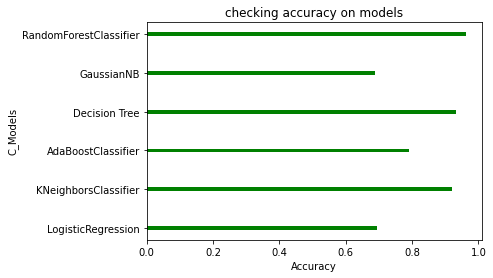

In [59]:
plt.barh(C_Models, Accuracy,
        height = 0.1, color = "green")
 
plt.xlabel("Accuracy")
plt.ylabel("C_Models")
plt.title("checking accuracy on models")
plt.show()


In [60]:
#creating pickle files to save the trained models in a file

#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train)

pickle.dump(model, open('classification.pkl', 'wb'))


In [61]:
#metrics
Y_pred=model.predict(X_test)
print('confusion_matrix\n',confusion_matrix(Y_test, Y_pred))
print('accuracy_score',accuracy_score(Y_test, Y_pred))
print('f1_score',f1_score(Y_test, Y_pred))
print('roc_auc_score',roc_auc_score(Y_test, Y_pred))

confusion_matrix
 [[33725   897]
 [ 1454 33532]]
accuracy_score 0.966225146534881
f1_score 0.9661312396456098
roc_auc_score 0.966266068555549


In [62]:
#Streamlit
!pip install streamlit

In [1]:
%%writefile app.py
import streamlit as st
import datetime
import pickle
from sklearn.preprocessing import StandardScaler

st.markdown('<h1 style="color:blue;">Copper</h1>', unsafe_allow_html=True)
st.caption('Industrial Copper Modeling')
tab1, tab2 = st.tabs(["Price_Prediction", "Order Status"])

with tab1:
  st.markdown('<h2 style="color:blue;">Selling Price Finder</h2>', unsafe_allow_html=True)
  st.markdown('<h2 style="color:blue;">Enter the Details</h2>', unsafe_allow_html=True)
  x=[]
  with st.form("Details1"):
      quantity = st.text_input('Quantity')
      item = st.selectbox('Item Type',('W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'))
      country = st.selectbox('Country Code',(28, 25, 30, 32, 38, 78, 27, 77, 113, 79, 26, 39, 40, 84, 80, 107, 89))
      application = st.selectbox('Application Type',(10, 41, 28, 59, 15, 4, 38, 56, 42, 26, 27, 19, 20, 66, 
                                                     29, 22, 40, 25, 67, 79, 3, 99, 2, 5,39, 69, 70, 65, 58, 68))
      thickness = st.text_input('Thickness')
      width = st.text_input('Width')
      product = st.selectbox('Product Reference',(1670798778, 1668701718, 628377, 640665, 611993, 1668701376,
                                           164141591, 1671863738, 1332077137,     640405, 1693867550, 1665572374,
                                           1282007633, 1668701698, 628117, 1690738206, 628112, 640400,
                                           1671876026, 164336407, 164337175, 1668701725, 1665572032, 611728,
                                           1721130331, 1693867563, 611733, 1690738219, 1722207579, 929423819,
                                           1665584320, 1665584662, 1665584642))
      order_date = st.date_input("Order Date",datetime.date(2022, 1, 1))
      delivery_date = st.date_input("Estimated Delivery Date",datetime.date(2022, 12, 1))
      submit_button = st.form_submit_button(label="Price")
  k1=['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
  v1=[5, 6, 3, 1, 2, 0, 4]
  k2=[28, 25, 30, 32, 38, 78, 27, 77, 113, 79, 26, 39, 40, 84, 80, 107, 89]
  v2=[3, 0, 4, 5, 6, 10,  2, 9, 16, 11, 1, 7, 8, 13, 12, 15, 14]
  k3=[10, 41, 28, 59, 15, 4, 38, 56, 42, 26, 27, 19, 20, 66, 29, 22, 40, 25, 67, 79, 3, 99, 2, 5,
      39, 69, 70, 65, 58, 68]
  v3=[4, 17, 12, 21, 5, 2, 14, 19, 18, 10, 11, 6, 7, 23, 13,  8, 16,  9, 24, 28, 1, 29, 0, 3,
      15, 26, 27, 22, 20, 25]
  k4=[1670798778, 1668701718, 628377, 640665, 611993, 1668701376,
      164141591, 1671863738, 1332077137,     640405, 1693867550, 1665572374,
      1282007633, 1668701698, 628117, 1690738206, 628112, 640400,
      1671876026, 164336407, 164337175, 1668701725, 1665572032, 611728,
      1721130331, 1693867563, 611733, 1690738219, 1722207579, 929423819,
      1665584320, 1665584662, 1665584642]
  v4=[24, 22, 5, 8, 2, 20 , 9, 25, 14, 7, 29, 16, 13, 21, 4, 27, 3, 6, 26, 10, 11, 23, 15, 0,
      31, 30, 1, 28, 32, 12, 17, 19, 18]
  if submit_button:
    x.append(float(quantity))
    for i in range(0,len(k1)):
      if item==k1[i]:
        item_type=v1[i]
    x.append(int(item_type))

    for i in range(0,len(k2)):
      if country==k2[i]:
        country_code=v2[i]
    x.append(int(country_code))
      
    for i in range(0,len(k3)):
      if application==k3[i]:
        application_type=v3[i]
    x.append(int(application_type))

    x.append(float(thickness))
    x.append(float(width))

    for i in range(0,len(k4)):
      if product==k4[i]:
        product_ref=v4[i]
    x.append(int(product_ref))
    
    date_1 = datetime.datetime.strptime(str(order_date), "%Y-%m-%d")
    end_date = datetime.datetime.strptime(str(delivery_date), "%Y-%m-%d")
    day=  end_date - date_1
    x.append(day.days)
    # fit scaler on training data
    pickled_scaling = pickle.load(open('scaling_regression.pkl', 'rb'))
    x_=pickled_scaling.transform([x])

    #loading a trained model from pickle file
    pickled_model = pickle.load(open('regression.pkl', 'rb'))
    pred=pickled_model.predict(x_)
    if pred!=None:
      st.info(pred[0])

with tab2:
  st.markdown('<h2 style="color:blue;">Order Status Finder</h2>', unsafe_allow_html=True)
  st.markdown('<h2 style="color:blue;">Enter the Details</h2>', unsafe_allow_html=True)

  with st.form("Details2"):
      quantity = st.text_input('Quantity')
      item = st.selectbox('Item Type',('W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'))
      country = st.selectbox('Country Code',(28, 25, 30, 32, 38, 78, 27, 77, 113, 79, 26, 39, 40, 84, 80, 107, 89))
      application = st.selectbox('Application Type',(10, 41, 28, 59, 15, 4, 38, 56, 42, 26, 27, 19, 20, 66, 
                                                     29, 22, 40, 25, 67, 79, 3, 99, 2, 5,39, 69, 70, 65, 58, 68))
      thickness = st.text_input('Thickness')
      width = st.text_input('Width')
      product = st.selectbox('Product Reference',(1670798778, 1668701718, 628377, 640665, 611993, 1668701376,
                                           164141591, 1671863738, 1332077137,     640405, 1693867550, 1665572374,
                                           1282007633, 1668701698, 628117, 1690738206, 628112, 640400,
                                           1671876026, 164336407, 164337175, 1668701725, 1665572032, 611728,
                                           1721130331, 1693867563, 611733, 1690738219, 1722207579, 929423819,
                                           1665584320, 1665584662, 1665584642))
      selling_price = st.text_input('Price')
      order_date = st.date_input("Order Date",datetime.date(2022, 1, 1))
      delivery_date = st.date_input("Estimated Delivery Date",datetime.date(2022, 1, 1))
      submit_button = st.form_submit_button(label="Status")
  k1=['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
  v1=[5, 6, 3, 1, 2, 0, 4]
  k2=[28, 25, 30, 32, 38, 78, 27, 77, 113, 79, 26, 39, 40, 84, 80, 107, 89]
  v2=[3, 0, 4, 5, 6, 10,  2, 9, 16, 11, 1, 7, 8, 13, 12, 15, 14]
  k3=[10, 41, 28, 59, 15, 4, 38, 56, 42, 26, 27, 19, 20, 66, 29, 22, 40, 25, 67, 79, 3, 99, 2, 5,
      39, 69, 70, 65, 58, 68]
  v3=[4, 17, 12, 21, 5, 2, 14, 19, 18, 10, 11, 6, 7, 23, 13,  8, 16,  9, 24, 28, 1, 29, 0, 3,
      15, 26, 27, 22, 20, 25]
  k4=[1670798778, 1668701718, 628377, 640665, 611993, 1668701376,
      164141591, 1671863738, 1332077137,     640405, 1693867550, 1665572374,
      1282007633, 1668701698, 628117, 1690738206, 628112, 640400,
      1671876026, 164336407, 164337175, 1668701725, 1665572032, 611728,
      1721130331, 1693867563, 611733, 1690738219, 1722207579, 929423819,
      1665584320, 1665584662, 1665584642]
  v4=[24, 22, 5, 8, 2, 20 , 9, 25, 14, 7, 29, 16, 13, 21, 4, 27, 3, 6, 26, 10, 11, 23, 15, 0,
      31, 30, 1, 28, 32, 12, 17, 19, 18]
  if submit_button:
    x.append(float(quantity))
    for i in range(0,len(k1)):
      if item==k1[i]:
        item_type=v1[i]
    x.append(int(item_type))

    for i in range(0,len(k2)):
      if country==k2[i]:
        country_code=v2[i]
    x.append(int(country_code))
      
    for i in range(0,len(k3)):
      if application==k3[i]:
        application_type=v3[i]
    x.append(int(application_type))

    x.append(float(thickness))
    x.append(float(width))

    for i in range(0,len(k4)):
      if product==k4[i]:
        product_ref=v4[i]
    x.append(int(product_ref))

    x.append(float(selling_price))
    
    date_1 = datetime.datetime.strptime(str(order_date), "%Y-%m-%d")
    end_date = datetime.datetime.strptime(str(delivery_date), "%Y-%m-%d")
    day=  end_date - date_1
    x.append(day.days)

    # fit scaler on training data
    pickled_scaling = pickle.load(open('scaling_Classification.pkl', 'rb'))
    x_=pickled_scaling.transform([x])

    #loading a trained model from pickle file
    pickled_model = pickle.load(open('classification.pkl', 'rb'))
    pred=pickled_model.predict(x_)
    if pred[0]==1:
      st.info('Won')
    elif pred[0]==0:
      st.info('Lost')


Overwriting app.py


In [2]:
!streamlit run app.py

^C


In [1]:
!pip install --upgrade streamlit

In [4]:
!pip install altair


In [6]:
! pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
altair                             5.2.0
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
apyori                             1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [7]:
pip install altair==4.1.0

  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Attempting uninstall: altair
    Found existing installation: altair 5.2.0
    Uninstalling altair-5.2.0:
      Successfully uninstalled altair-5.2.0
Note: you may need to restart the kernel to use updated packages.
